
# Regression


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snsp
import pandas as pd

## L1 and L2 Regularization

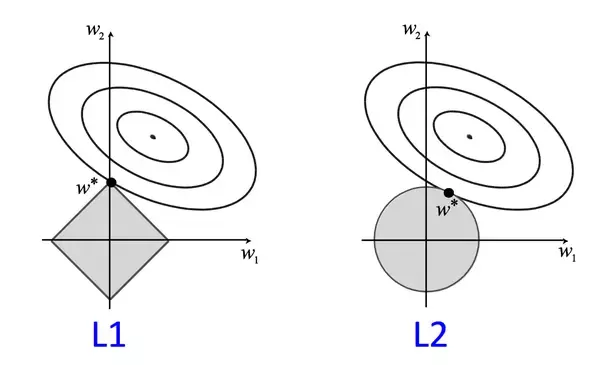

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

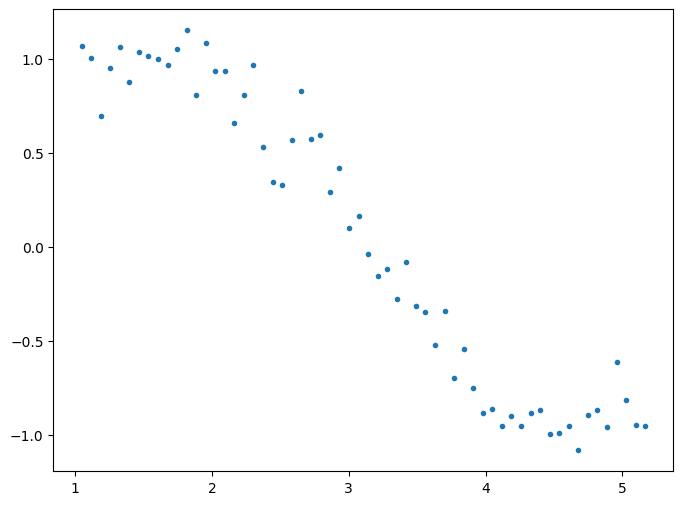

In [49]:
import random
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,6

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

In [50]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head()) 

    x    y  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11  x_12  x_13  \
0   1  1.1  1.1  1.1  1.2  1.3  1.3  1.4  1.4  1.5   1.6   1.7   1.7   1.8   
1 1.1    1  1.2  1.4  1.6  1.7  1.9  2.2  2.4  2.7     3   3.4   3.8   4.2   
2 1.2  0.7  1.4  1.7    2  2.4  2.8  3.3  3.9  4.7   5.5   6.6   7.8   9.3   
3 1.3 0.95  1.6    2  2.5  3.1  3.9  4.9  6.2  7.8   9.8    12    16    19   
4 1.3  1.1  1.8  2.3  3.1  4.1  5.4  7.2  9.6   13    17    22    30    39   

   x_14  x_15  
0   1.9     2  
1   4.7   5.3  
2    11    13  
3    24    31  
4    52    69  


In [51]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

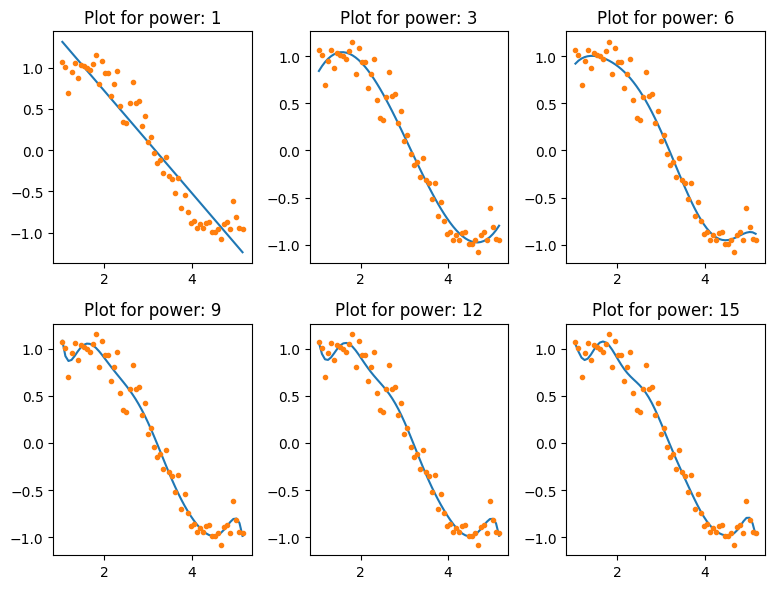

In [52]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)



In [53]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [54]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:
data

/home/dzyga/miniconda3/envs/MyEnv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.04792e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/dzyga/miniconda3/envs/MyEnv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.41282e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/dzyga/miniconda3/envs/MyEnv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.89039e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/dzyga/miniconda3/envs/MyEnv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.69428e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

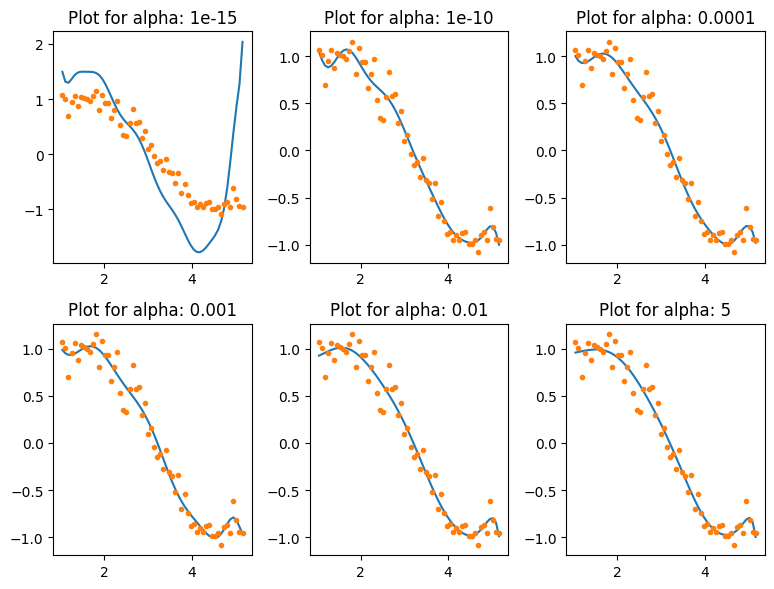

In [55]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [56]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,33,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,3.4,-1.8,-1.9,-0.5,1.5,2,-0.48,-3.8,4.1,-1.9,0.39,-0.0083,-0.015,0.0034,-0.00033,1.2e-05
alpha_0.01,0.93,1.1,-0.27,-0.18,0.11,0.3,0.13,-0.26,-0.22,0.4,-0.22,0.055,-0.0046,-0.0009,0.00028,-2.8e-05,1e-06
alpha_1,0.94,0.87,0.0072,0.018,0.027,0.027,0.012,-0.01,-0.02,-0.0024,0.017,-0.0082,0.00095,0.00034,-0.00013,1.6e-05,-7.3e-07
alpha_5,0.95,0.92,0.0036,0.0083,0.013,0.014,0.0095,-2.1e-05,-0.0087,-0.0072,0.0041,0.0051,-0.0049,0.0018,-0.00033,3.2e-05,-1.3e-06
alpha_10,0.95,0.93,0.0026,0.0061,0.0093,0.011,0.0078,0.00065,-0.0067,-0.0065,0.003,0.0047,-0.0042,0.0015,-0.00028,2.7e-05,-1e-06
alpha_20,0.95,0.95,0.0017,0.0041,0.0064,0.0075,0.006,0.0013,-0.0044,-0.0056,0.00087,0.0054,-0.0041,0.0014,-0.00025,2.4e-05,-9.1e-07


In [57]:
from sklearn import linear_model
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [58]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

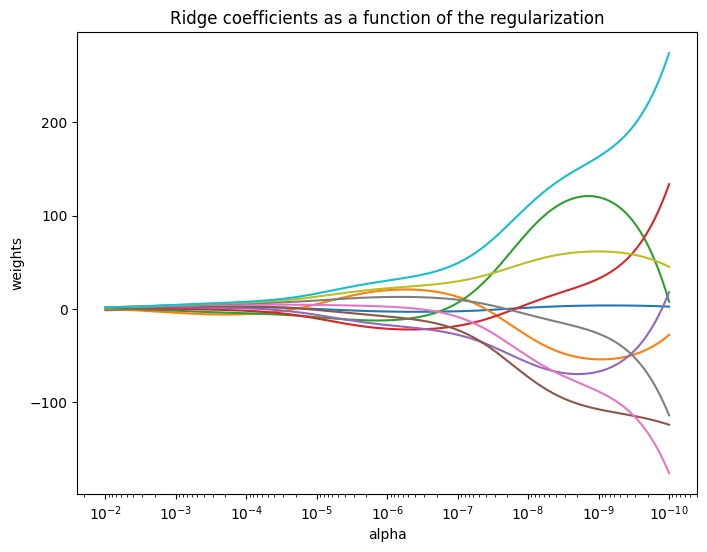

In [59]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

## Support vector machine: SVM 

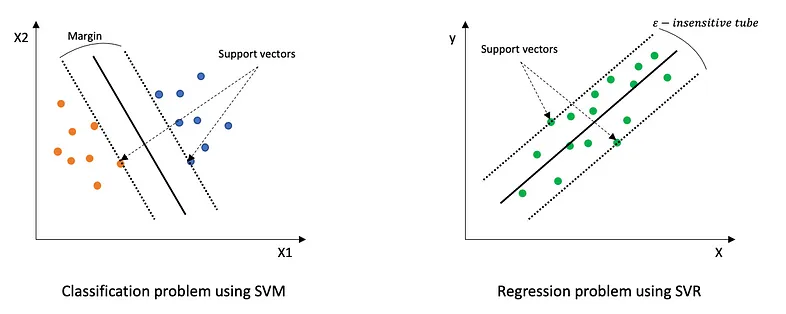

https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927

In [60]:
import pandas as pd

df = pd.read_csv('data/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.5,19
1,4,0.096,7.7
2,4,3.1,14
3,6,7.9,53
4,8,7.8,55


In [61]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose 
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']


In [62]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# X_train[:10], X_train_scaled[:10]

In [64]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

Text(0, 0.5, 'Marks')

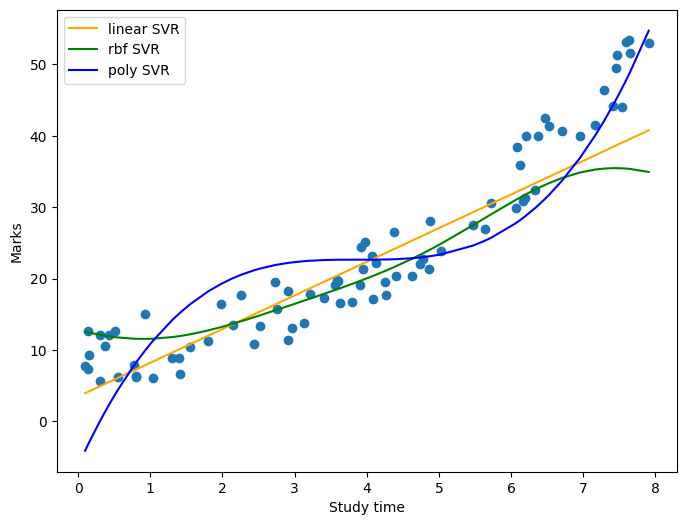

In [65]:
#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [66]:
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: 0.83
rmse: 6.7


Text(0, 0.5, 'Actual')

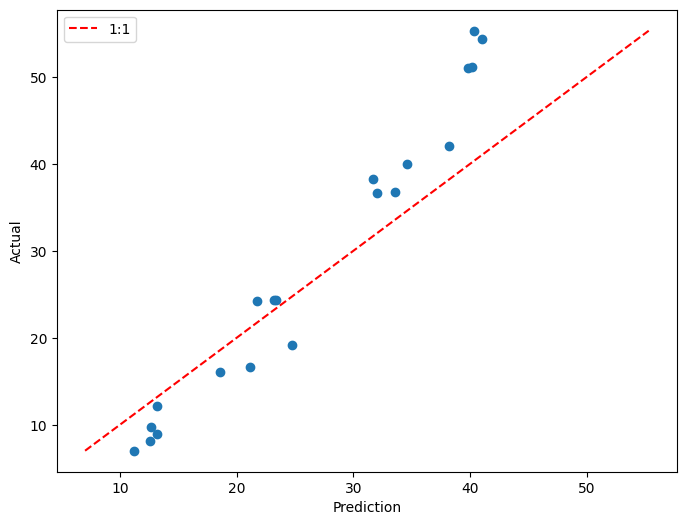

In [67]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_x = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

https://medium.com/@nandiniverma78988/an-introduction-to-support-vector-regression-svr-in-machine-learning-681d541a829a

In [ ]:


# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', lw=2, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Logistic regression

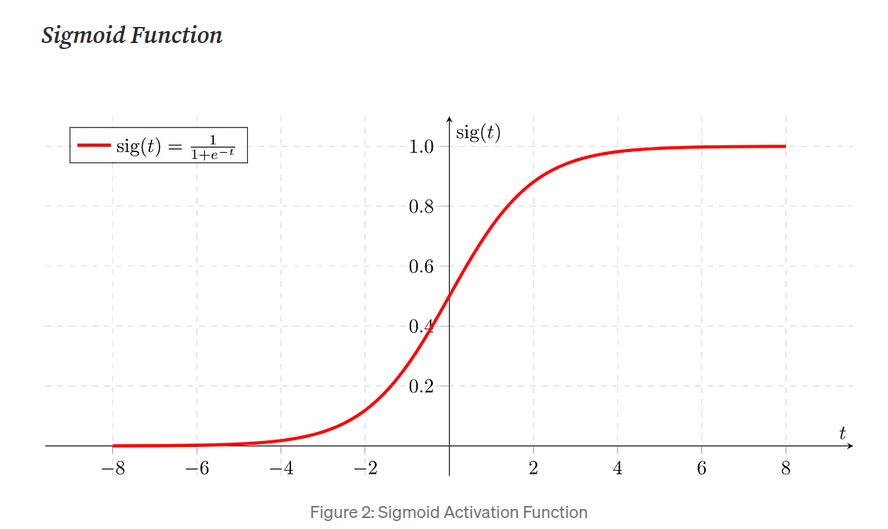


https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [ ]:
# Use datasets from sklearn

from sklearn.datasets import load_digits
digits = load_digits()

print('Image Data Shape' , digits.data.shape)
print("Label Data Shape", digits.target.shape)

In [ ]:
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 12)

### Train-test split
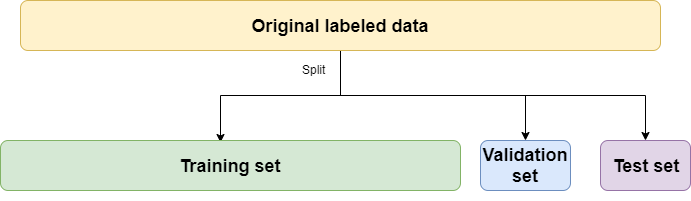

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)

In [ ]:
logisticRegr.predict(x_test[0].reshape(1,-1))

In [ ]:
logisticRegr.predict(x_test[0:10])

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Logistic regression by scratch 

In [ ]:
min(x_train[0]), max(x_train[0]), x_train.shape

Linear regression:
$z^{(i)} = w^T x^{(i)} + b \tag{1}$

Activation function sigmoid:
$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$

Log-loss function:
$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Cost function
$$ J(w, b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$

Key steps: 

    - Initialize the parameters of the model
    - Train the parameters for the model by minimizing the cost  
    - Predict on the test set with trained parameters
    - Evaluate the result

In [ ]:
def sigmoid(z):
    s = 1/(1+np.exp(z)**(-1))
    return s

In [ ]:
sigmoid([0, 1, 2, 3, 4])

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """
    w = np.zeros((dim, 1), dtype = float) # for coefficients
    b = int(0) # for bias
   
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
w, b = initialize_with_zeros(2)
w, b

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.


Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset with a non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = np.sin(X) + np.random.normal(0, 0.5, 50)

# Fit OLS and Ridge Regression models with polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1, 1))
ols = LinearRegression().fit(X_poly, y)
ridge = Ridge(alpha=1).fit(X_poly, y)

# Predict the output for the test data points
X_test = np.linspace(-2, 12, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
ols_pred = ols.predict(X_test_poly)
ridge_pred = ridge.predict(X_test_poly)

# Compute the mean squared error on the test dataset
ols_mse = mean_squared_error(y_true=y, y_pred=ols.predict(X_poly))
ridge_mse = mean_squared_error(y_true=y, y_pred=ridge.predict(X_poly))

# Plot the data and the regression lines for OLS
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ols_pred, color='red', label=f'OLS (MSE={ols_mse:.2f})')
plt.legend()
plt.title('Ordinary Least Squares with Polynomial Features')
plt.show()

# Plot the data and the regression lines for Ridge Regression
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ridge_pred, color='green', label=f'Ridge (MSE={ridge_mse:.2f})')
plt.legend()
plt.title('Ridge Regression with Polynomial Features')
plt.show()
